In [25]:
import os
import pandas  as pd
import numpy   as np
import matplotlib.pyplot as plt
import pickle
import cv2
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import BatchNormalization
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten,Dropout
from keras.datasets import cifar10
from keras.utils import normalize, to_categorical
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array
from keras.callbacks import ReduceLROnPlateau
from keras.applications import VGG16
from keras.optimizers import SGD,Adam

In [26]:
path='train'
images=[]
labels=[]

mylist=os.listdir(path)
print(len(mylist))

52


In [27]:
for cl in mylist:
    imgcur=cv2.imread(f'{path}/{cl}')
    images.append(imgcur)
    labels.append(os.path.splitext(cl)[0])
    
    
    


In [29]:
datagen = ImageDataGenerator( 
        width_shift_range=0.1,
        height_shift_range=0.1,
        
        rescale=1./255.,
        zoom_range=0.1,
        horizontal_flip=False,
        vertical_flip=False,
        zca_whitening=True,
        fill_mode='nearest')


In [30]:
path='preview'
x_train=[]
y=[]
y_train=[]

myl=os.listdir(path)
print(len(myl))
for cl in myl:
    imgc=cv2.imread(f'{path}/{cl}')
    x_train.append(imgc)
    y.append(os.path.splitext(cl)[0])
    y_train.append(y[-1].split('_', 1)[0])
    

1611


In [31]:
x_train[0].shape

(86, 96, 3)

In [33]:
data=images+x_train
anno=labels+y_train

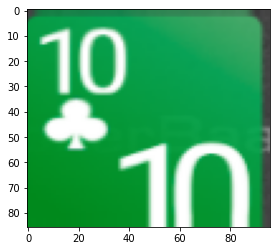

In [34]:
plt.figure()
plt.imshow(data[60])
plt.show()

In [35]:
anno[60]

'10C'

In [36]:
y_train[50]

'JS'

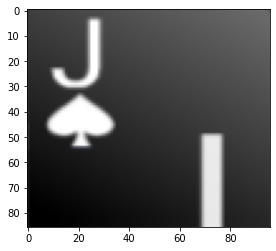

In [37]:
plt.figure()
plt.imshow(x_train[50])
plt.show()

In [38]:
#from keras.applications.vgg16 import preprocess_input
#x_train=preprocess_input(x_train)

In [39]:
"""
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.25, random_state=42)
"""

'\nfrom sklearn.model_selection import train_test_split\nx_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.25, random_state=42)\n'

In [40]:
mapping = {}
for x in range(len(labels)):
  mapping[labels[x]] = x

for x in range(len(anno)):
  anno[x] = mapping[anno[x]]

anno = to_categorical(anno)
print(anno)
""""
for x in range(len(y_val)):
  y_val[x] = mapping[y_val[x]]

y_val = to_categorical(y_val)
print(y_val)
"""

[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


'"\nfor x in range(len(y_val)):\n  y_val[x] = mapping[y_val[x]]\n\ny_val = to_categorical(y_val)\nprint(y_val)\n'

In [41]:
d=np.array(data)

In [42]:
import keras
model=keras.models.Sequential()
vgg=VGG16(include_top=False, input_shape=(86,96,3),pooling='avg')
model.add(vgg)

In [43]:
vgg.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 86, 96, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 86, 96, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 86, 96, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 43, 48, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 43, 48, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 43, 48, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 21, 24, 128)       0     

In [44]:
model.add(Flatten())
for layer in model.layers:
    layer.trainable=False 


In [45]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 512)               14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 512)               0         
Total params: 14,714,688
Trainable params: 0
Non-trainable params: 14,714,688
_________________________________________________________________


In [46]:
model.add(Dropout(rate=0.25))
model.add(Dense(256,activation=('relu')))
model.add(Dense(52,activation=('softmax'))) 



In [47]:
for layer in model.layers:
    print(layer.trainable)

False
False
True
True
True


In [48]:
import keras

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(d,anno, epochs=10, validation_split=0.2,batch_size=1)
model.summary()


Epoch 1/10
1330/1330 [==============================] - 72s 54ms/step - loss: 7.8940 - accuracy: 0.2678 - val_loss: 1.0282 - val_accuracy: 0.7417
Epoch 2/10
1330/1330 [==============================] - 81s 61ms/step - loss: 1.0449 - accuracy: 0.7200 - val_loss: 0.3401 - val_accuracy: 0.8979
Epoch 3/10
1330/1330 [==============================] - 100s 75ms/step - loss: 0.7611 - accuracy: 0.7974 - val_loss: 0.4302 - val_accuracy: 0.8979
Epoch 4/10
1330/1330 [==============================] - 97s 73ms/step - loss: 0.6803 - accuracy: 0.8381 - val_loss: 0.1959 - val_accuracy: 0.9189
Epoch 5/10
1330/1330 [==============================] - 99s 74ms/step - loss: 0.4382 - accuracy: 0.8946 - val_loss: 0.2855 - val_accuracy: 0.9249
Epoch 6/10
1330/1330 [==============================] - 90s 67ms/step - loss: 0.5923 - accuracy: 0.8613 - val_loss: 0.2483 - val_accuracy: 0.9309
Epoch 7/10
1330/1330 [==============================] - 103s 77ms/step - loss: 0.4439 - accuracy: 0.8938 - val_loss: 0.0633

In [49]:
path2='test'
A=[]
x_test=[]
y_test=[]

lis=os.listdir(path2)
print(len(lis))
for cl in lis:
    img=cv2.imread(f'{path2}/{cl}')
    x_test.append(img)
    A.append(cl)
    

845


In [50]:
x_test=np.array(x_test)

In [51]:
p=model.predict_classes(x_test)

/home/aditi/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [52]:
mapp = {}
B=[]
for x in range(len(labels)):
  mapp[x] = labels[x]

for x in range(len(p)):
    B.append(mapp[p[x]])
    
    

In [53]:
probabilities = model.predict_proba(x_test)

/home/aditi/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


In [54]:
probabilities.shape

(845, 52)

In [58]:
prob=[]
for i in range(len(p)):
    prob.append(probabilities[i,p[i]])
    

In [59]:
len(prob)

845

In [60]:
df=pd.DataFrame({"A":A,"B":B,"C":prob},
               columns=["A","B","C"])

In [61]:
df.to_csv('submission.csv') 